# 2D visualization

In [1]:
from bokeh.io import output_notebook, show;
output_notebook();

from bokeh.plotting import figure;
from bokeh.models import ColumnDataSource;
import numpy as np;
from bokeh.io import push_notebook;

Loading BokehJS ...

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

z = np.array([-10, -10, -10, -10])
y = softmax(z)

source = ColumnDataSource(data=dict(x=z, y=y))

p = figure(title="simple line example",
           plot_height=300, plot_width=600,
           x_range=(-10, 10), y_range=(0, 1))
p.xaxis.axis_label = "Logits"
p.yaxis.axis_label = "Probabilites (Activations)"

p.circle(z, y, 
         source=source, name="foo",
         size=10, fill_alpha=0.2, 
         color=['red', 'green', 'blue', 'black'])


def update(z1=0, z2=-10, z3=-10, z4=-10):
    zdata = np.array([z1, z2, z3, z4])
    source.data['x'] = zdata
    source.data['y'] = softmax(zdata)
    push_notebook()
    
    
show(p, notebook_handle=True)

from ipywidgets import interact
interact(update, z1=(-10, 10, 0.2), z2=(-10, 10, 0.2), z3=(-10, 10, 0.2), z4=(-10, 10, 0.2));

# 3D visualization

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [5]:
def softmax(vec):
    exped = np.exp(vec)
    denom = np.sum(exped)
    return [e/denom for e in exped]

<IPython.core.display.Javascript object>


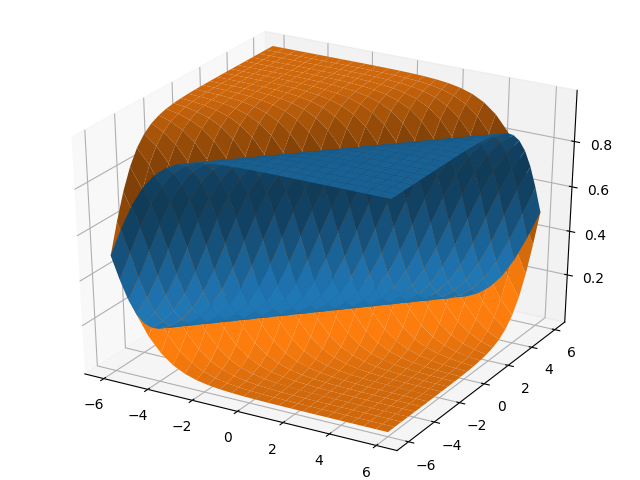

In [6]:
# pick a weight to be learned
target_weights = [4.3, -8.7]

# generate data
x = np.linspace(-6, 6, 24)
y = np.linspace(-6, 6, 24)

X, Y = np.meshgrid(x, y)
Z1 = []
Z2 = []
for z in zip(X.reshape(-1), Y.reshape(-1)):
    Z1.append(softmax([z[0],z[1]])[0])
    Z2.append(softmax([z[0],z[1]])[1])    
Z1 = np.array(Z1).reshape(24,-1)
Z2 = np.array(Z2).reshape(24,-1)

#plot data
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z1)
ax.plot_surface(X, Y, Z2)